In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [111]:
dataset = pd.read_csv("../dataset/train.csv")
dataset.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [112]:
y = dataset['Survived']
dataset = dataset.drop(columns=['PassengerId', 'Name', 'Ticket'])

dataset.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S


In [113]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Pclass

In [114]:
dataset['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [115]:
survival_rate = dataset.groupby('Pclass')['Survived'].mean() * 100
survival_rate

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_26004\1597128627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=survival_rate.index, y=survival_rate.values, palette='viridis')


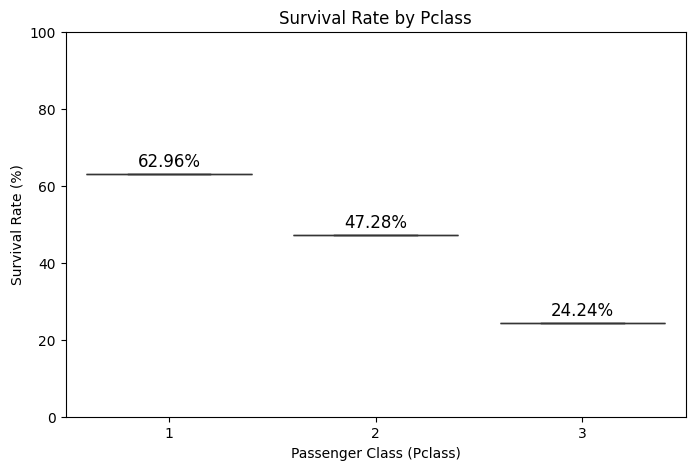

In [116]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=survival_rate.index, y=survival_rate.values, palette='viridis')

plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Pclass")
plt.ylim(0, 100)

for i, val in enumerate(survival_rate.values):
    plt.text(i, val + 2, f"{val:.2f}%", ha="center", fontsize=12)

plt.show()

Sex

In [117]:
dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [118]:
survival_rate = dataset.groupby('Sex')['Survived'].mean() * 100
survival_rate

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

SibSp

In [119]:
dataset['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [120]:
survival_rate = dataset.groupby('SibSp')['Survived'].mean() * 100
survival_rate

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

Parch

In [121]:
dataset['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [122]:
survival_rate = dataset.groupby('Parch')['Survived'].mean() * 100
survival_rate

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64

Embarked

In [123]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [124]:
dataset.groupby('Embarked')['Survived'].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

Cabin

In [125]:
dataset["Cabin"].nunique()

147

In [126]:
dataset["Cabin"] = dataset["Cabin"].apply(lambda x: x if x in ['A', 'B', 'C', 'D', 'E', 'F', 'G'] else "0")

dataset['Cabin'].value_counts()

Cabin
0    888
D      3
Name: count, dtype: int64